In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_blobs, make_moons
from sklearn import metrics

In [2]:
df = pd.read_csv('US_Accidents_June20.csv',index_col='ID',parse_dates=['Start_Time','End_Time'])

In [3]:
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday
df['Day'] = df['Start_Time'].dt.day
df['Impact'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds()/60
df["YMD"] = df["Start_Time"].dt.date

In [4]:
# clean the data based on the condition that the impact on traffic is between zero-one week,and drop duplicates
one_week = 60*24*7
df_clean = df[(df['Impact']>0) & (df['Impact']< one_week)].drop_duplicates(subset=[
    'Start_Time',
    'End_Time',
    'City',
    'Street',
    'Number',
    'Description'])

In [5]:
df1 = df_clean[['YMD',
                'City',
                'Start_Lat',
                'Start_Lng',
                'Impact',
                'Severity']]

In [93]:
CA_df = df1[df["State"] == "CA"]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [7]:
CA_df.head(10)

,YMD,City,Start_Lat,Start_Lng,Impact,Severity
ID,,,,,,
A-729,2016-06-21,Vallejo,38.085300,-122.233017,30.000000,3
A-730,2016-06-21,Hayward,37.631813,-122.084167,46.383333,3
A-731,2016-06-21,Walnut Creek,37.896564,-122.070717,30.000000,2
A-732,2016-06-21,Cupertino,37.334255,-122.032471,30.000000,3
A-733,2016-06-21,San Jose,37.250729,-121.910713,47.833333,2
A-734,2016-06-21,Pleasanton,37.701584,-121.906929,45.333333,3
A-735,2016-06-21,San Jose,37.328312,-121.871811,46.550000,3
A-736,2016-06-21,San Francisco,37.719162,-122.448273,30.000000,3
A-737,2016-06-21,Orinda,37.868114,-122.195930,30.000000,2


In [46]:
#BBox = (CA_df.Start_Lat.min(), CA_df.Start_Lat.max(), CA_df.Start_Lng.min(), CA_df.Start_Lng.max())

#print(BBox)

(32.542587, 42.00542, -124.36923200000001, -114.300598)


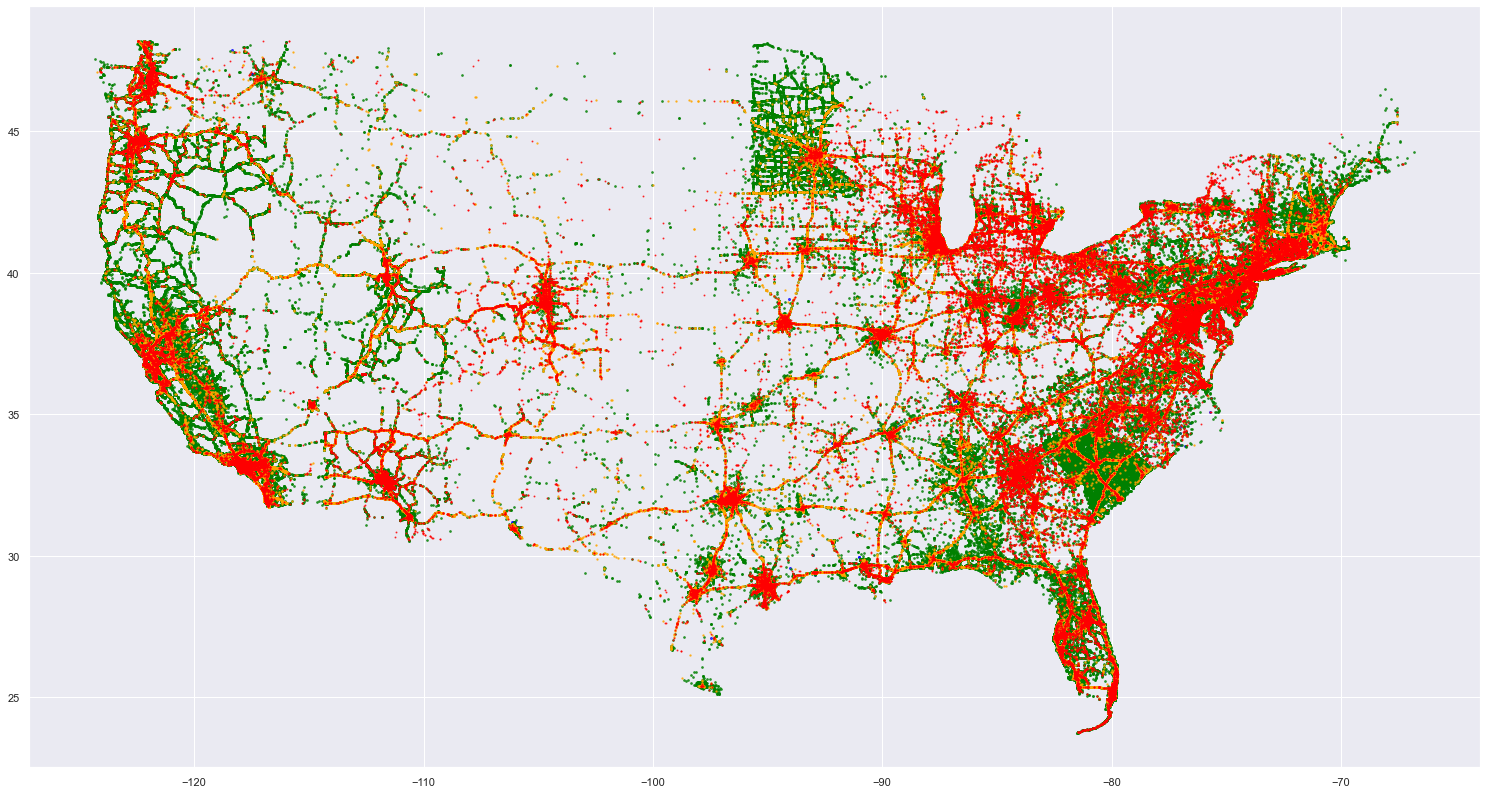

In [91]:
fig, ax = plt.subplots(figsize=(26,14))
ax.scatter(df1[df1['Severity']==1].Start_Lng+0.3,
           df1[df1['Severity']==1].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='blue', s=4)
ax.scatter(df1[df1['Severity']==2].Start_Lng+0.3,
           df1[df1['Severity']==2].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='green', s=3)
ax.scatter(df1[df1['Severity']==3].Start_Lng+0.3,
           df1[df1['Severity']==3].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='orange', s=2)
ax.scatter(df1[df1['Severity']==4].Start_Lng+0.3,
           df1[df1['Severity']==4].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='red', s=1)

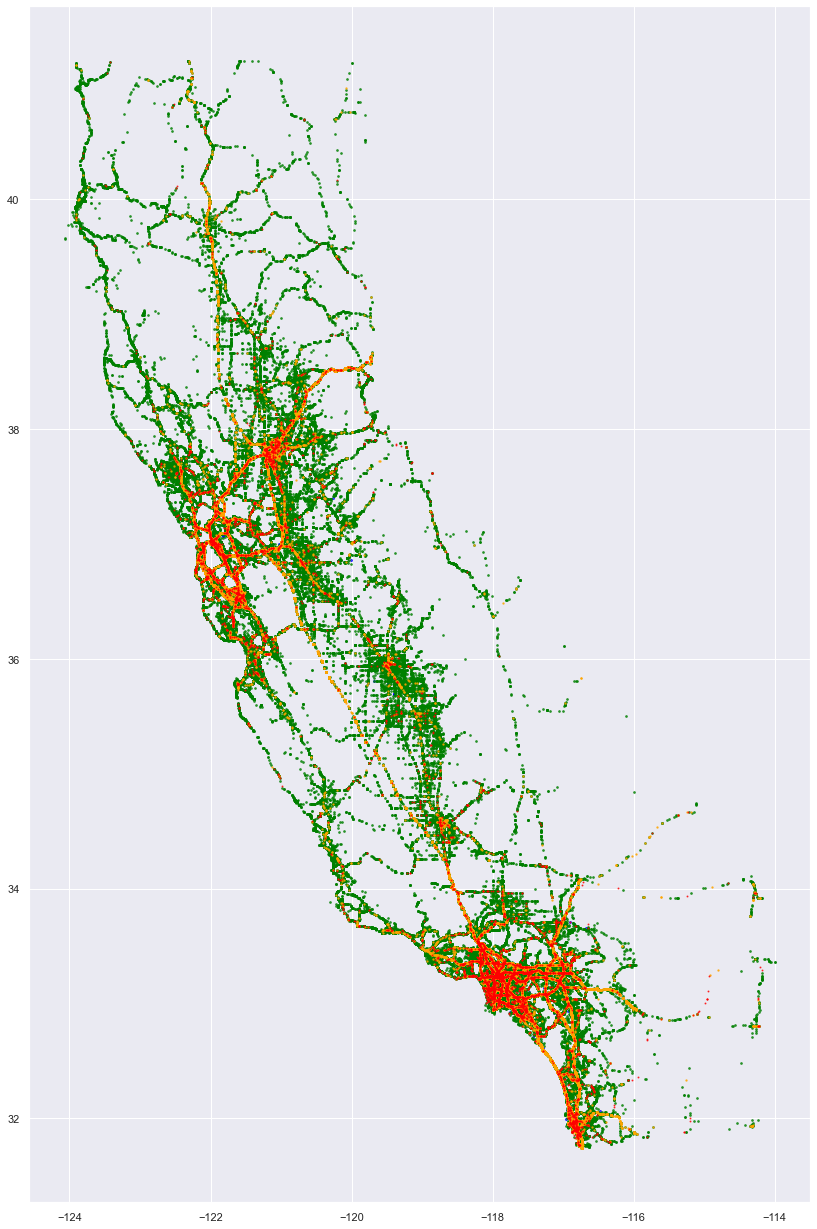

In [43]:
fig, ax = plt.subplots(figsize = (14,22))
ax.scatter(CA_df[CA_df['Severity']==1].Start_Lng+0.3,
           CA_df[CA_df['Severity']==1].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='blue', s=4)
ax.scatter(CA_df[CA_df['Severity']==2].Start_Lng+0.3,
           CA_df[CA_df['Severity']==2].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='green', s=3)
ax.scatter(CA_df[CA_df['Severity']==3].Start_Lng+0.3,
           CA_df[CA_df['Severity']==3].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='orange', s=2)
ax.scatter(CA_df[CA_df['Severity']==4].Start_Lng+0.3,
           CA_df[CA_df['Severity']==4].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='red', s=1)

In [95]:
X = CA_df[['Start_Lng', 'Start_Lat']]

# Iterative k_Means Implementation

In [88]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Random initialization (choose random clusters)
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    print("Initial centers:\n", np.round(centers, 2))

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        print("\nNew centers:\n", np.round(new_centers, 2))
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers


    return centers, labels

In [89]:
centers, labels = find_clusters(X, 4)

KeyError: "None of [Int64Index([601369, 687247, 253482, 52851], dtype='int64')] are in the [columns]"

In [ ]:

fig, ax = plt.subplots(figsize = (14,22))
ax.scatter(CA_df.Start_Lng+0.3,
           CA_df.Start_Lat-0.8,
           c=labels,
           zorder=1, alpha=0.7, s=4)
plt.scatter(centers[:, 0], centers[:, 1], c='k' ,marker='x', s=100, alpha=0.7)


# CA Kmeans

In [82]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


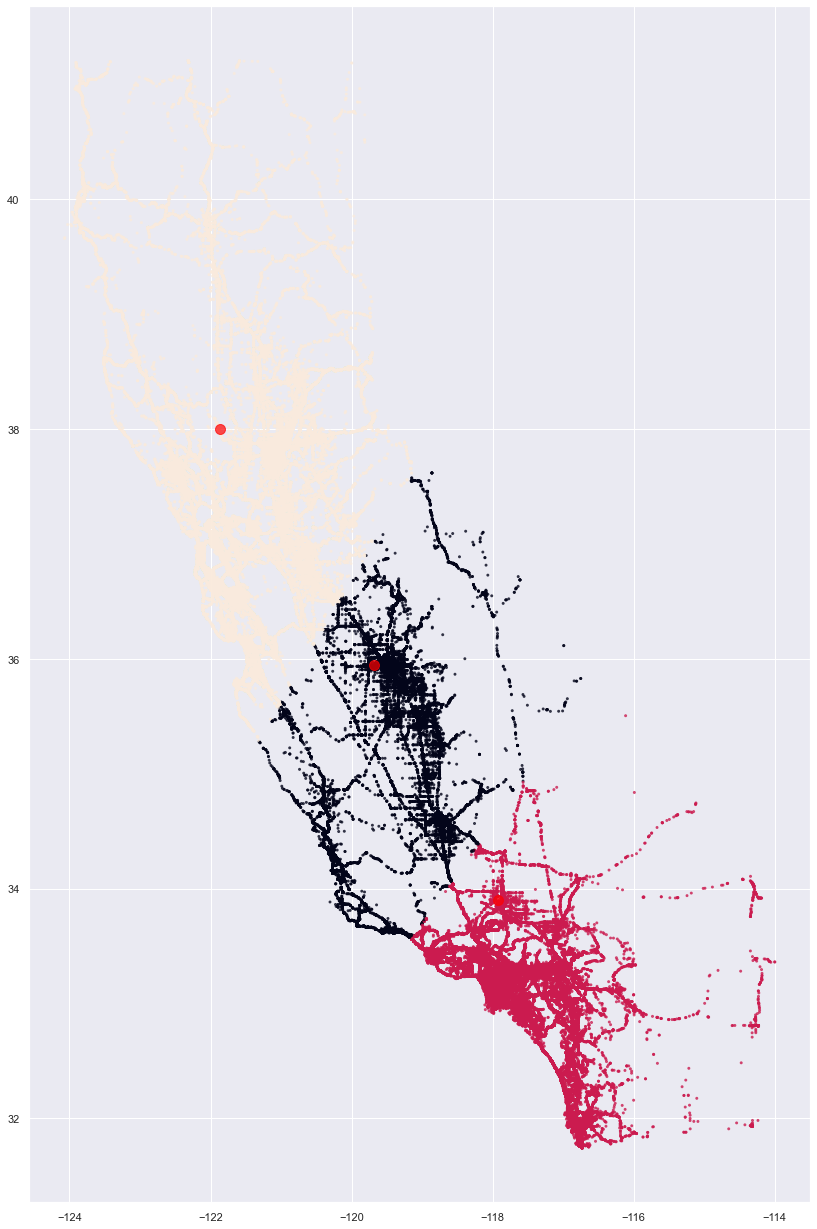

In [84]:
fig, ax = plt.subplots(figsize = (14,22))
ax.scatter(CA_df.Start_Lng+0.3,
           CA_df.Start_Lat-0.8,
           c=y_kmeans,
           zorder=1, alpha=0.7, s=4)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='k' ,marker='x', s=100, alpha=0.7)

#Elbow Method

In [85]:
kmeans.inertia_

460510.030681525

In [86]:
# Elbow method for optimal number of clusters

n_clusters = np.arange(1, 12)

models = [KMeans(n,random_state=0).fit(X)
         for n in n_clusters]

metrics = [model.inertia_ for model in models]
metrics

[6468888.726310474,
 620619.1083721588,
 460510.030681525,
 361915.50309503445,
 264619.42172387673,
 222050.99980814222,
 179589.06851655038,
 151120.06868646518,
 128900.11381392836,
 115489.29256160848,
 104539.31253185922]

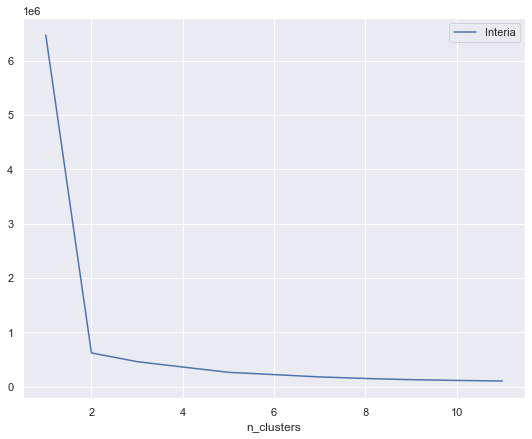

In [87]:
fig, ax = plt.subplots(figsize=(9,7))

ax.plot(n_clusters, metrics, label='Interia')

plt.legend(loc='best')
plt.xlabel('n_clusters');

# TEST Kmeans

In [102]:
test_df = df_clean[df["State"] == "TX"]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [103]:
X2 = test_df[['Start_Lng', 'Start_Lat']]

In [119]:
X_test = X2
fig_x = 20
fig_y = 16

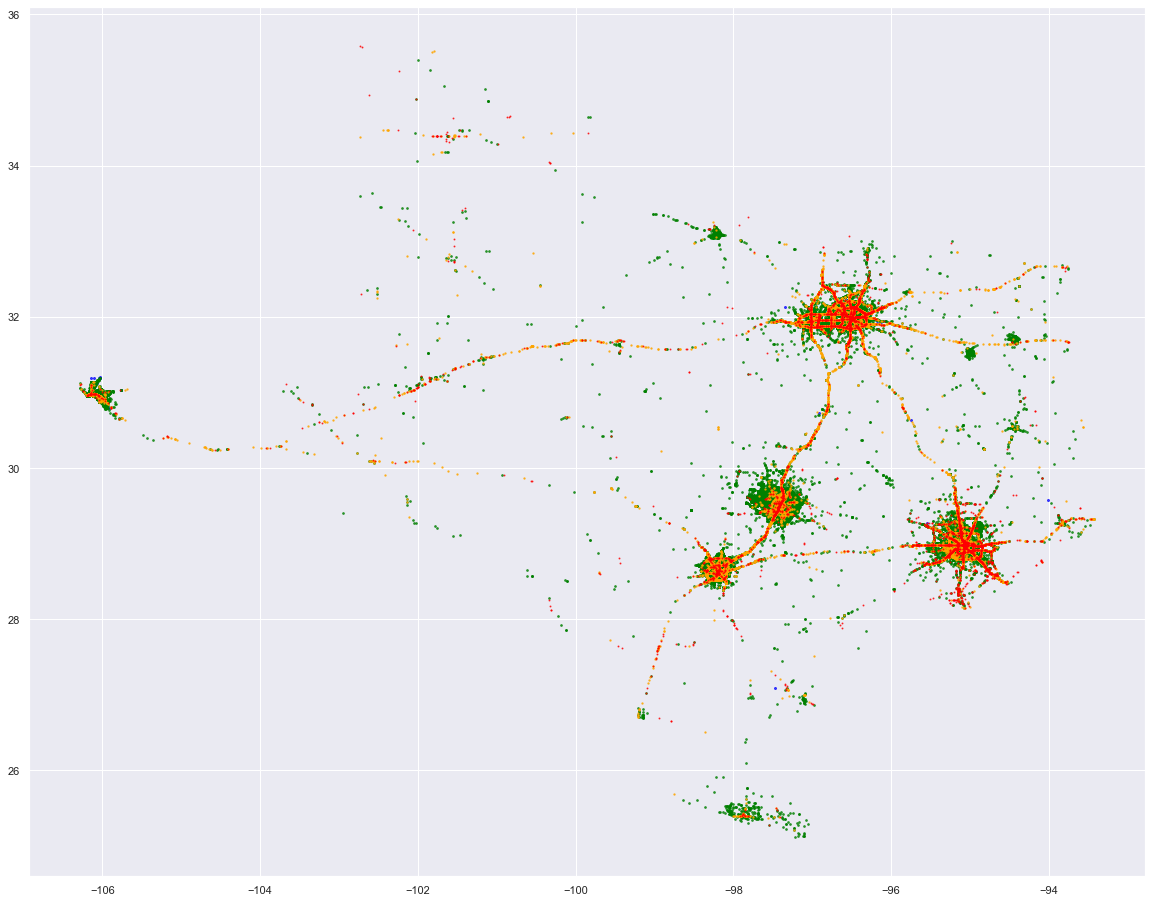

In [108]:
fig, ax = plt.subplots(figsize = (fig_x,fig_y))
ax.scatter(test_df[test_df['Severity']==1].Start_Lng+0.3,
           test_df[test_df['Severity']==1].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='blue', s=4)
ax.scatter(test_df[test_df['Severity']==2].Start_Lng+0.3,
           test_df[test_df['Severity']==2].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='green', s=3)
ax.scatter(test_df[test_df['Severity']==3].Start_Lng+0.3,
           test_df[test_df['Severity']==3].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='orange', s=2)
ax.scatter(test_df[test_df['Severity']==4].Start_Lng+0.3,
           test_df[test_df['Severity']==4].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='red', s=1)

In [129]:
n_test = 6

In [130]:
kmeans = KMeans(n_clusters=n_test, random_state=0)
kmeans.fit(X_test)
y_kmeans = kmeans.predict(X_test)


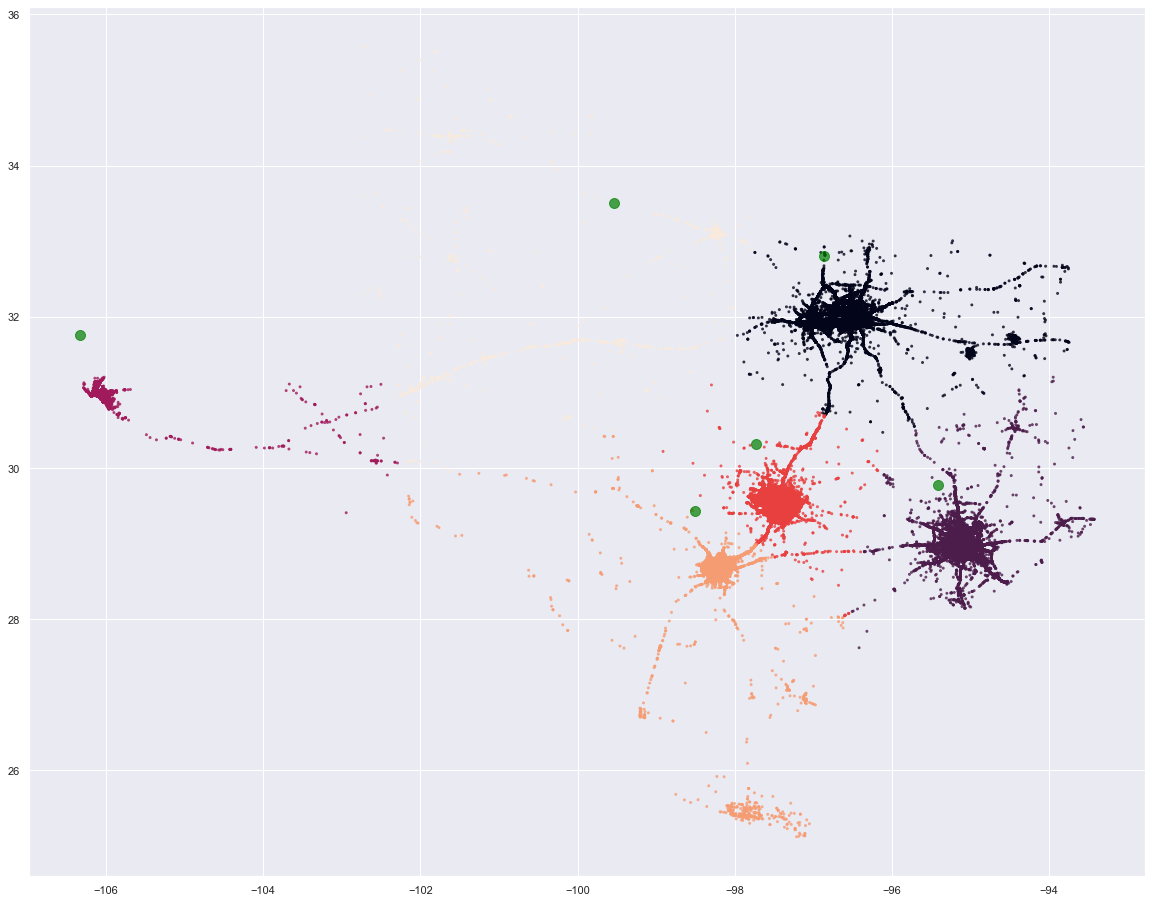

In [131]:
fig, ax = plt.subplots(figsize = (fig_x,fig_y))
ax.scatter(test_df.Start_Lng+0.3,
           test_df.Start_Lat-0.8,
           c=y_kmeans,
           zorder=1, alpha=0.7, s=4)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=100, alpha=0.7)

# Test Elbow Method

In [132]:
kmeans.inertia_

24880.203568020275

In [133]:
# Elbow method for optimal number of clusters

n_clusters = np.arange(1, 12)

models = [KMeans(n,random_state=0).fit(X2)
         for n in n_clusters]

metrics = [model.inertia_ for model in models]
metrics

[2047918.9152948007,
 992786.8521894863,
 400988.25751689664,
 59304.44691021183,
 32901.084689283176,
 24880.203568020293,
 20940.319876644826,
 17405.431792260224,
 15428.18075492679,
 12408.674775704634,
 11282.395271962007]

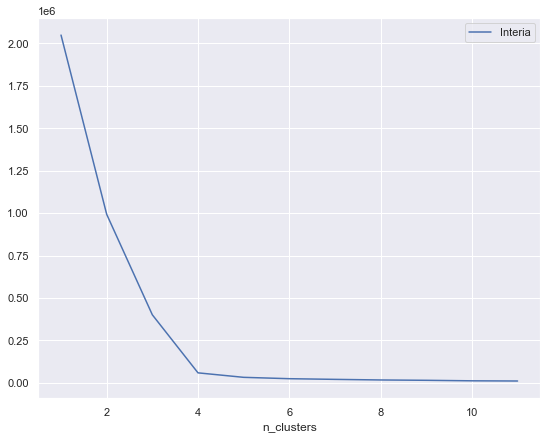

In [134]:
fig, ax = plt.subplots(figsize=(9,7))

ax.plot(n_clusters, metrics, label='Interia')

plt.legend(loc='best')
plt.xlabel('n_clusters');


# Test GMM

In [138]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                            angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):

    fig, ax = plt.subplots(figsize=(9,7))
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)

    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=50, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, ax=ax, alpha=w * w_factor)

TypeError: '(slice(None, None, None), 0)' is an invalid key

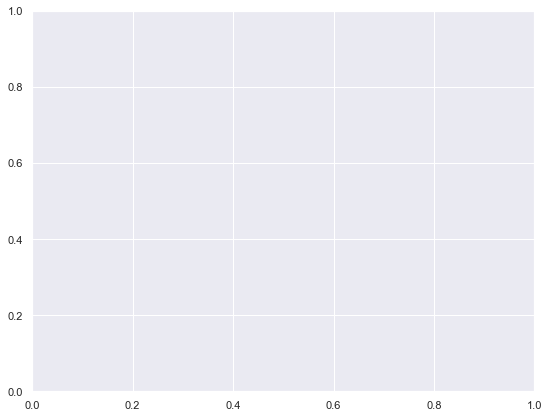

In [139]:
X3 = X2 # better plotting

from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=4, random_state=0)

plot_gmm(gmm, X3)